In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

mpl.rcParams['grid.linewidth'] = 0.5
np.random.seed(12345)

## Fig 1.1

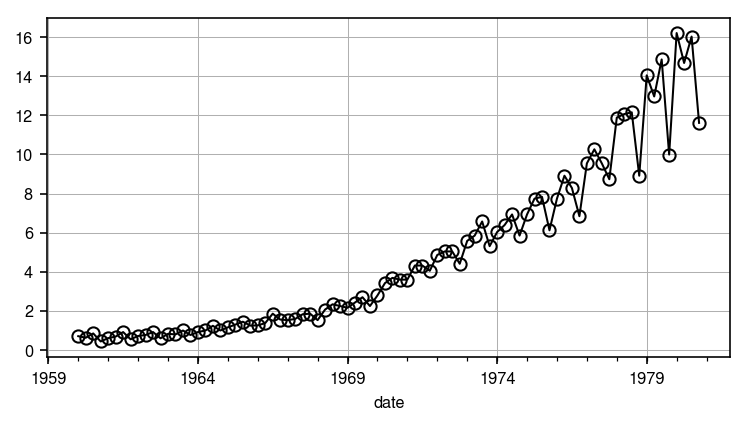

In [2]:
def str_qdate_period(str_date):
    return pd.Period(freq="Q", 
                     year=int(str_date[:4]), 
                     quarter=int(str_date[-1]))
             
df = pd.read_csv("../data/csv/jj.csv", 
                 header=None, 
                 names=["date", "eps"], 
                 converters={"date": str_qdate_period},
                 index_col="date")

df.plot.line(marker='o', markerfacecolor='None', legend=None, color='k', lw=1, figsize=(6,3), grid=True)

## Fig 1.2

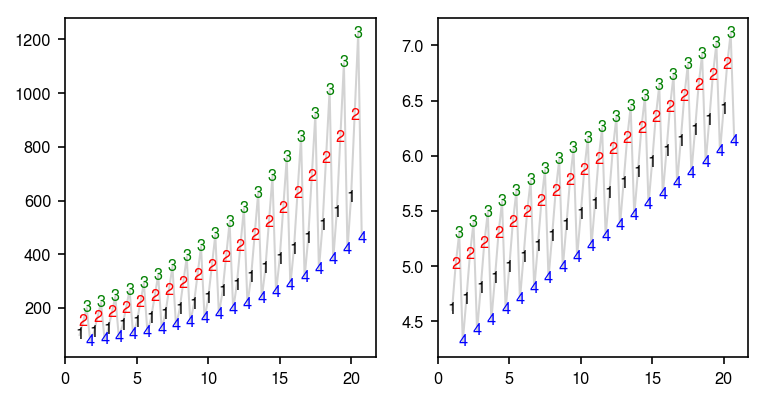

In [3]:
returns = [100, 150, 200, 75]

for i in range(4, 80):
    returns.append(returns[-4] * 1.1)

log_returns = np.log(returns[:4])
for i in range(4, 80):
    log_returns = np.append(log_returns, np.log(1.1) + np.log(returns[i-4]))

quarter = [1, 2, 3, 4] * 20

colors = ['k', 'r', 'g', 'b'] * 20

period = np.arange(1, 21, 0.25)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
ax1.plot(period, returns, color='lightgrey', lw=1)
for i in range(80):
    ax1.text(period[i], returns[i], str(quarter[i]), color=colors[i], ha='center', va='center')
    
ax2.plot(period, log_returns, color='lightgrey', lw=1)
for i in range(80):
    ax2.text(period[i], log_returns[i], str(quarter[i]), color=colors[i], ha='center', va='center')    

## Fig 1.3

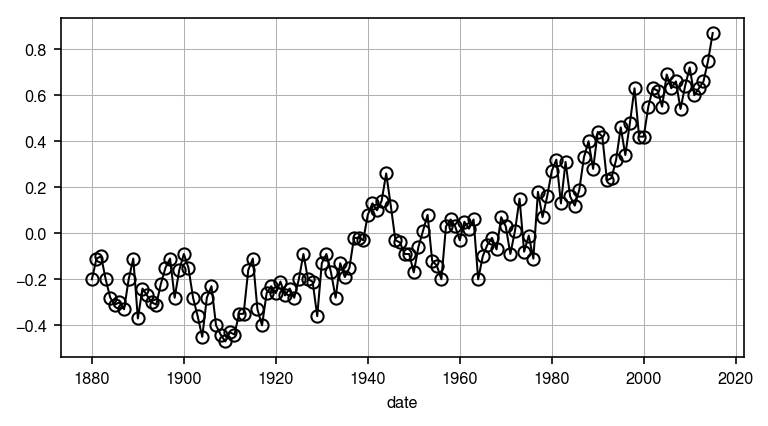

In [4]:
df = pd.read_csv("../data/csv/globtemp.csv",
                 header=None, 
                 names=["date", "temp"],
                 index_col="date")

df.plot.line(marker='o', markerfacecolor='None', legend=None, color='k', lw=1, figsize=(6,3), grid=True)

## Fig 1.4

In [5]:
df = pd.read_csv("../data/csv/djia.csv", 
                 header=0,
                 converters={'Index': lambda x: pd.to_datetime(x, unit='s')},
                 index_col='Index')

In [6]:
df['log_returns'] = np.log(df['Close']) - np.log(df['Close'].shift(1))

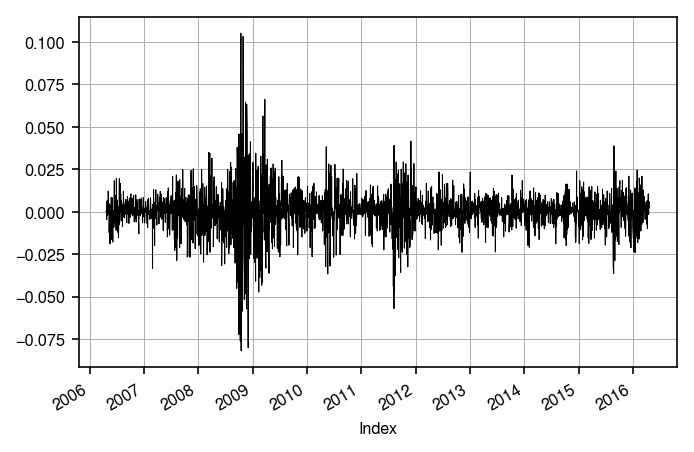

In [7]:
df['log_returns'].plot.line(color='k', lw=0.5, grid=True)

## Fig 1.5

In [8]:
df_soi = pd.read_csv("../data/csv/soi.csv",
                     header=None,
                     names=['date', 'soi'],
                     parse_dates=['date'],
                     index_col='date')

df_rec = pd.read_csv("../data/csv/rec.csv",
                     header=None,
                     names=['date', 'rec'],
                     parse_dates=['date'],
                     index_col='date')

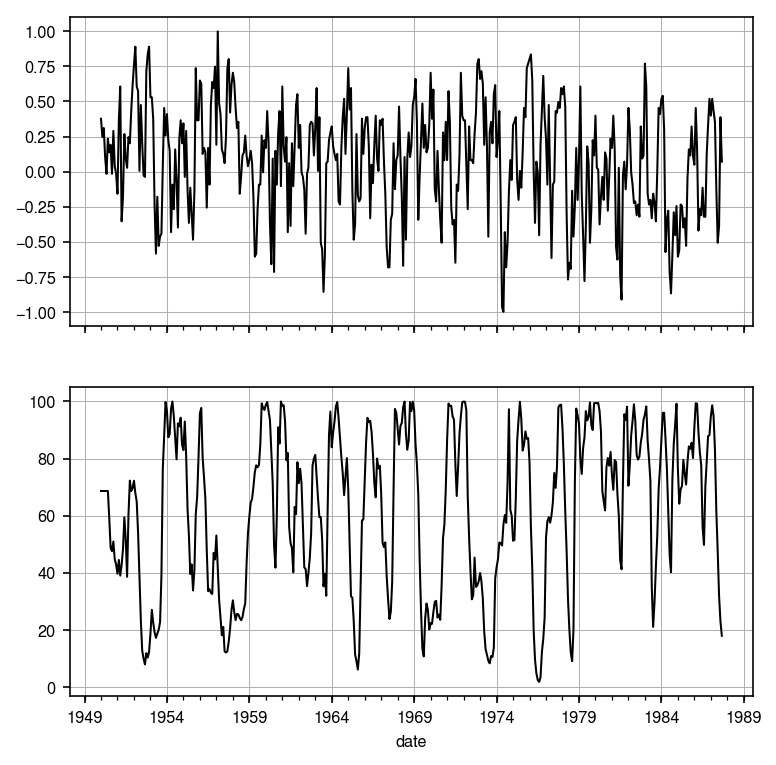

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,6))
df_soi.plot.line(ax=ax1, legend=None, color='k', lw=1, grid=True)
df_rec.plot.line(ax=ax2, legend=None, color='k', lw=1, grid=True)

## Fig 1.6

TODO: FMRI data

## Fig 1.7

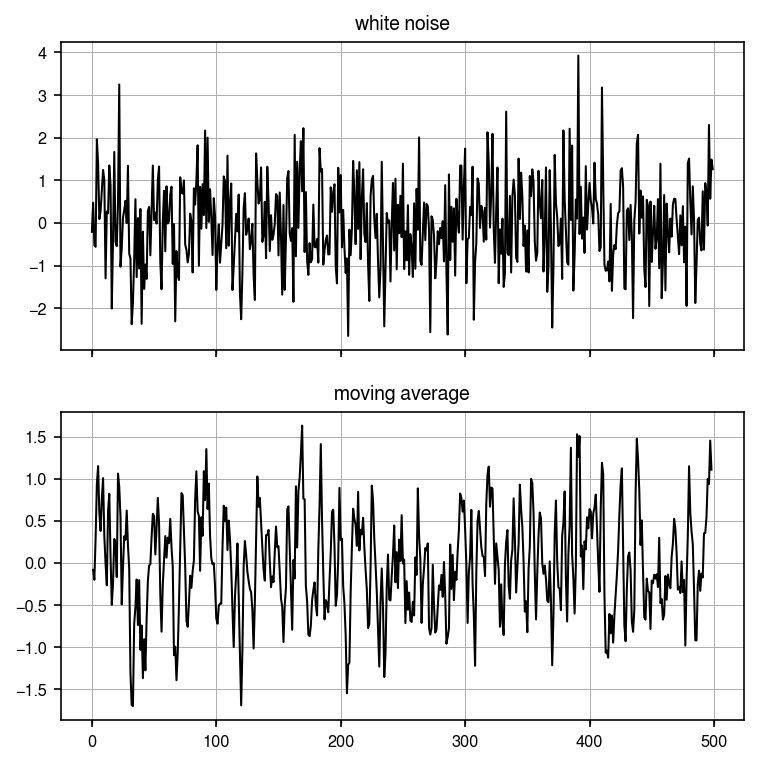

In [10]:
white_noise = pd.Series(np.random.randn(500))
white_noise_rm = pd.Series(white_noise).rolling(3, center=True).mean()

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,6))
white_noise.plot.line(ax=ax1, legend=None, color='k', lw=1, title='white noise', grid=True)
white_noise_rm.plot.line(ax=ax2, legend=None, color='k', lw=1, title='moving average', grid=True)

## Fig 1.8

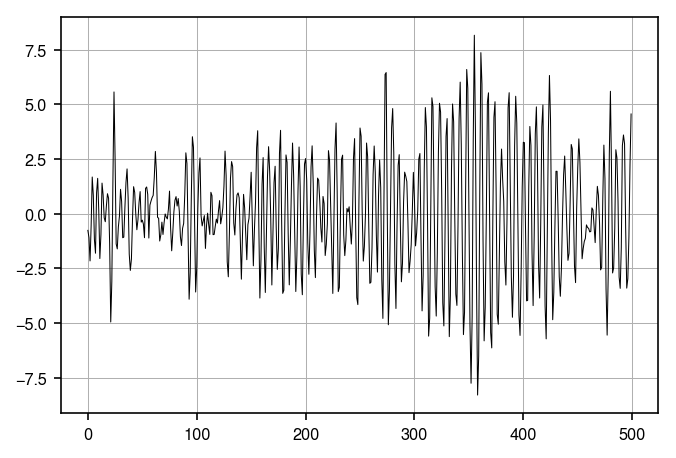

In [11]:
fig, ax = plt.subplots()
ar_process = pd.Series(sm.tsa.arma_generate_sample(ar=[1,-1,0.9], ma=[1], nsample=500))
ar_process.plot.line(color='k', lw=0.5, grid=True)

In [12]:
model = sm.tsa.ARMA(ar_process, (2, 0)).fit(trend='nc', disp=0)
model.params

ar.L1.y    0.990781
ar.L2.y   -0.910309
dtype: float64

## Fig 1.9

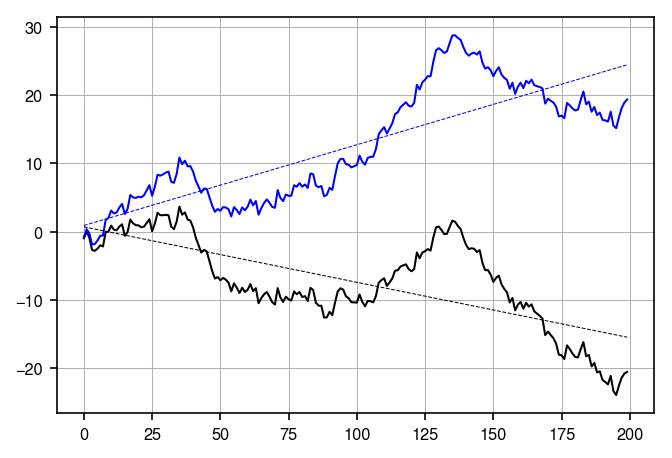

In [13]:
white_noise = pd.Series(np.random.randn(200))
def calc_trend_line(series):
    f = np.poly1d(np.polyfit(series.index, series, 1))
    return pd.Series(f(series.index))

fig, ax = plt.subplots()
white_noise.cumsum().plot.line(color='k', lw=1, ax=ax)
calc_trend_line(white_noise.cumsum()).plot.line(color='k', ls='--', lw=0.5, ax=ax)

white_noise.add(0.2).cumsum().plot.line(color='b', lw=1, ax=ax)
calc_trend_line(white_noise.add(0.2).cumsum()).plot.line(color='b', ls='--', lw=0.5, ax=ax)
ax.grid()